In [99]:
import tensorflow as tf

In [100]:
print(tf.__version__)

2.18.0


## Importing Liraries

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [103]:
dataset=pd.read_csv('creditcard.csv')
# df = df.dropna().reset_index(drop=True)


In [104]:
## Divide dataset to dependent and independent features
X=dataset.iloc[:, 1:-1]
y=dataset.iloc[:,-1]

### Split into train-test-split 

In [105]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)

## Feature Scaling

In [106]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [107]:
X_train[0]

array([ 0.99785119, -0.22962626, -0.20738468,  0.23421529, -0.36779128,
       -0.0640219 , -0.50588871,  0.03060393,  0.95995457, -0.02686352,
        0.61149957,  1.68999033,  1.26149805, -0.26397318, -0.36292946,
        0.34942719, -1.09376318,  0.77802759,  0.20615616, -0.1625072 ,
        0.32483903,  1.3366986 ,  0.08456891, -0.45980186, -0.08436785,
       -0.44894226,  0.11248883, -0.14374055, -0.30788875])

In [108]:
y_train

223361    0
165061    0
238186    0
150562    0
138452    0
         ..
119879    0
259178    0
131932    0
146867    0
121958    0
Name: Class, Length: 227845, dtype: int64

In [109]:
X_test

array([[ -8.43953559,   5.18252006, -12.31324997, ...,  -5.02350367,
         -3.16294175,   1.0815138 ],
       [  0.1730534 ,  -1.65602032,  -0.08791401, ...,   0.10210496,
          0.30863538,   1.69317258],
       [  0.71421679,  -0.35634288,   0.11194078, ...,   0.02847206,
          0.013272  ,  -0.22547388],
       ...,
       [  0.02018331,  -0.06601034,  -0.83557264, ...,   0.89063984,
          1.0738269 ,  -0.31714621],
       [ -0.25325795,   0.59873588,   1.10429699, ...,   0.10094377,
         -0.81883766,  -0.33299371],
       [ -0.81263064,   0.59930001,  -0.33800407, ...,   0.31303049,
         -1.8421089 ,   3.2080607 ]])

In [110]:
print(X_train.shape, X_test.shape)

(227845, 29) (56962, 29)


## Part 2: Creating an ANN 

In [111]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

In [112]:
# Initialize the ANN
classifier=Sequential()

In [113]:
# Adding the Input layer
classifier.add(Dense(units=11, activation='relu'))

In [114]:
# Adding the 1st hidden layer with dropout layer 
classifier.add(Dense(units=7))
classifier.add(Dropout(.3))

In [115]:
classifier.add(Dense(units=6))
classifier.add(Dropout(0.5))

In [116]:
classifier.add(Dense(units=1, activation='sigmoid'))

In [117]:
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [118]:
import tensorflow
opt = tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [119]:
# Early Stopping 
import tensorflow as tf
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)


In [120]:
model_history = classifier.fit(X_train,y_train,validation_split=0.33, batch_size=10, epochs=5, callbacks=early_stopping)

Epoch 1/5
15266/15266 ━━━━━━━━━━━━━━━━━━━━ 68s 4ms/step - accuracy: 0.9869 - loss: 0.0589 - val_accuracy: 0.9989 - val_loss: 0.0047
Epoch 2/5
15266/15266 ━━━━━━━━━━━━━━━━━━━━ 64s 4ms/step - accuracy: 0.9990 - loss: 0.0059 - val_accuracy: 0.9993 - val_loss: 0.0041
Epoch 3/5
15266/15266 ━━━━━━━━━━━━━━━━━━━━ 68s 4ms/step - accuracy: 0.9992 - loss: 0.0044 - val_accuracy: 0.9993 - val_loss: 0.0041
Epoch 4/5
15266/15266 ━━━━━━━━━━━━━━━━━━━━ 71s 5ms/step - accuracy: 0.9990 - loss: 0.0050 - val_accuracy: 0.9993 - val_loss: 0.0036
Epoch 5/5
15266/15266 ━━━━━━━━━━━━━━━━━━━━ 68s 4ms/step - accuracy: 0.9992 - loss: 0.0036 - val_accuracy: 0.9994 - val_loss: 0.0034


In [121]:
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

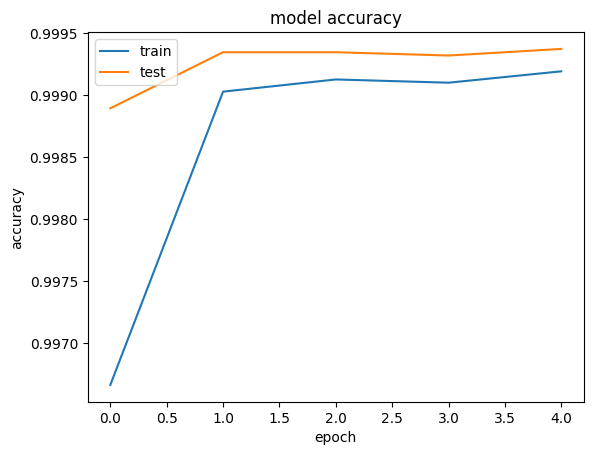

In [122]:
# summarize the history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')

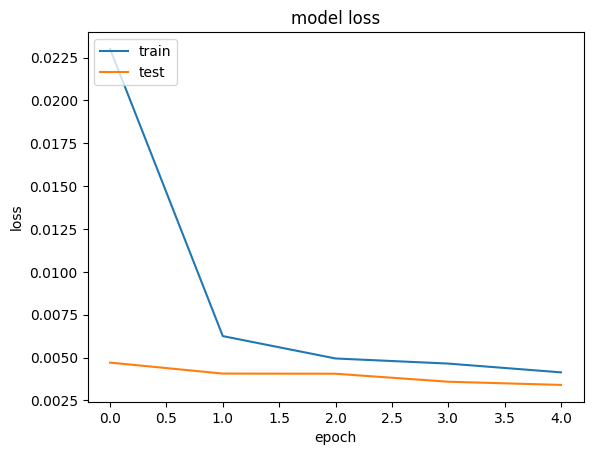

In [123]:
# summarize the history for accuracy
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')

## Predicting the Test values

In [124]:
# Making the prediction and evaluating the model
y_pred=classifier.predict(X_test)
y_pred = (y_pred >= 0.5)

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


In [125]:
# confusion matrix (WITHOUT DROPOUT LAYER)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)
cm

array([[56856,     8],
       [   34,    64]])

In [126]:
# confusion matrix(WITH DROPOUT LAYER)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)
cm

array([[56856,     8],
       [   34,    64]])

In [127]:
# calculate the accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
score

0.9992626663389628

## Test input 

In [143]:
new_input = np.array([-1.64, 1.52, -1.609850732,	3.997905588,	-0.522187865,	-1.426545319,	-2.537387306,	1.391657248,	-2.770089277,	-2.772272145,	3.202033207,	-2.899907388,	-0.595221881,	-4.289253782,	0.38972412,	-1.14074718,	-2.830055675,	-0.016822468,	0.416955705,	0.126910559,	0.517232371,	-0.035049369,	-0.465211076,	0.320198199,	0.044519167,	0.177839798,	0.261145003,	-0.143275875, 0])
output = np.array([1]) # value is True, bitch is Fraud

In [144]:
X_test.shape, new_input.shape

((56962, 29), (29,))

In [145]:
pred=classifier.predict(new_input.reshape(1,-1))
pred = (pred >= 0.5)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


In [146]:
pred

array([[ True]])

In [147]:
# confusion matrix (WITHOUT DROPOUT LAYER)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(output, pred)
cm

C:\Users\Krrish\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


array([[1]])

In [148]:
# confusion matrix(WITH DROPOUT LAYER)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(output, pred)
cm

C:\Users\Krrish\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


array([[1]])

In [150]:
# calculate the accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(pred,output)
score

1.0

In [154]:
classifier.save('fuck/ann_model.keras') 